In [1]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize']= (12,8)

In [3]:
data= pd.read_csv("food_truck_data.txt")

In [4]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0.5, 1.0, 'Profit in 10,000$ vs City Populationin 10,000s')

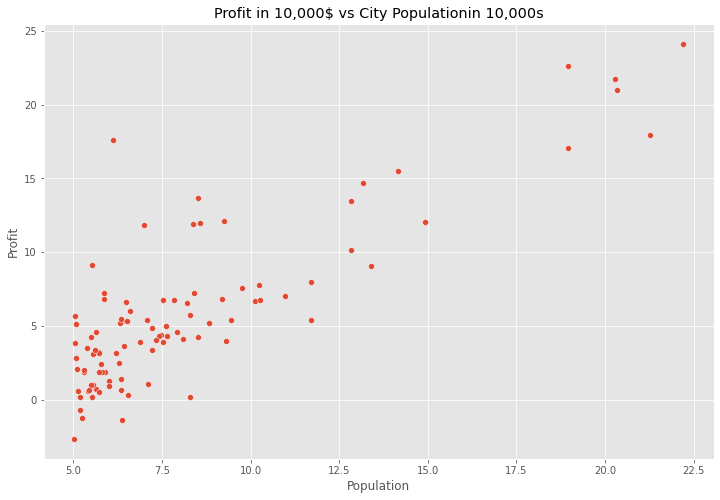

In [5]:
ax = sns.scatterplot(x= "Population", y="Profit", data= data)
ax.set_title("Profit in 10,000$ vs City Populationin 10,000s")

In [6]:
m = data.Population.values.size
x= np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis = 1)
y= data.Profit.values.reshape(m,1)
theta = np.zeros((2,1)) # took random values of the theta as [0,0] will optimize it

In [7]:
def cost_function(x, y , theta):
    m= len(y)
    y_pred = x.dot(theta) # .dot -- matrix mutiplication
    error = (y_pred - y)**2
    return 1/(2*m) * np.sum(error)

In [8]:
cost_function(x,y, theta) 

32.072733877455676

In [9]:
def grad_descent(x, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    y_pred_list = []
    error_list= []
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = np.dot(x.transpose(), (y_pred - y)) 
        costs.append(cost_function(x,y, theta))
        theta -= alpha * 1/m * error
        y_pred_list.append(y_pred)
        error_list.append(error)
    return costs, theta, y_pred_list, error_list 

In [10]:
costs, theta, y_pred_list, error_list  = grad_descent(x, y, theta, alpha = 0.01, iterations= 2000) 
print("h(x)= {} + {}x1".format(str(round(theta[0,0],2)), str(round(theta[1,0],2))))

h(x)= -3.79 + 1.18x1


In [11]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))
t_list = []
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        t_list.append(t)
        cost_values[i,j] = cost_function(x,y,t) 

In [12]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\91836\AppData\Local\Temp\ipykernel_14200\1894475782.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax= fig.gca(projection = "3d")
C:\Users\91836\AppData\Local\Temp\ipykernel_14200\1894475782.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink= 0.5, aspect = 5)


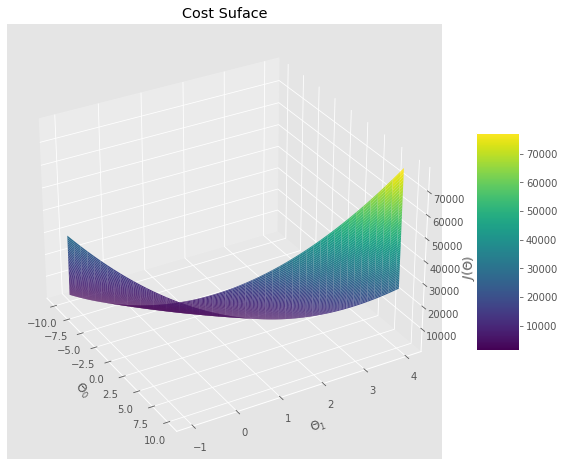

In [13]:
fig = plt.figure(figsize =(12,8))
ax= fig.gca(projection = "3d")

surf= ax.plot_surface(theta_0,theta_1, cost_values, cmap ='viridis', linewidth = 0.2)
fig.colorbar(surf, shrink= 0.5, aspect = 5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Suface")
ax.view_init(30,330)
plt.show()


Text(0.5, 1.0, 'Values of Cost Function over iterations of Gradient Descent')

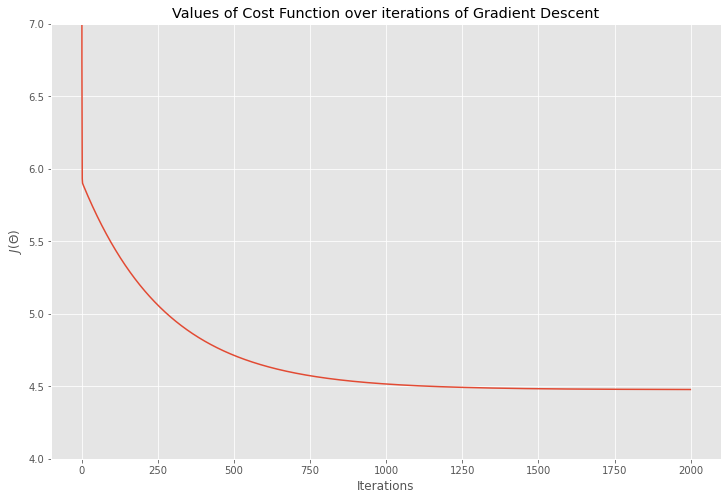

In [14]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.ylim(4,7)
plt.title("Values of Cost Function over iterations of Gradient Descent")

In [15]:
theta.shape, theta

((2, 1),
 array([[-3.78806857],
        [ 1.18221277]]))

c:\users\91836\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Linear Regression Fit')

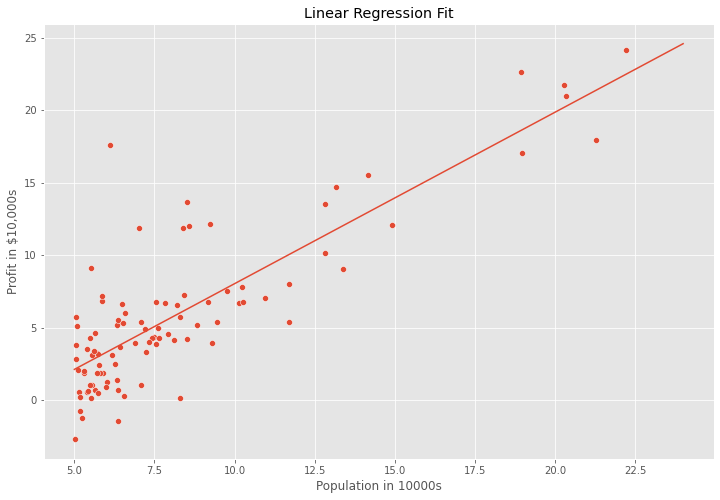

In [16]:
theta = np.squeeze(theta)
sns.scatterplot(x= "Population", y= "Profit", data= data)
x_value =[x for x in range(5,25)]
y_value = [(theta[0]+ theta[1]*x) for x in x_value]
sns.lineplot(x_value, y_value)
plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit")

In [17]:
def predict(x,theta):
    y_pred = np.dot(theta.transpose(),x)
    return y_pred

In [18]:
y_pred_1 = predict(np.array([1,4]), theta) *10000
y_pred_1

9407.825263063976